> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### 1- first we import the libraries we will use

#### 2- second view the data and its columns and datatypes

#### 3- clean and trim needed data to make the data more usable and change the data type for column whose data type is not describle and not good fit for the included data

#### 4- try to solve the questions using the clean data

### import important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
# Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### view the data and its info

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### here we show the info of the data to know which parts is good and which will need some operations to be clean and usable

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

## Data Cleaning

### 1- remove the columns that we will not need

In [4]:
to_be_drop_columns = ["id","imdb_id","homepage","tagline","keywords","overview"]
df.drop(to_be_drop_columns , inplace=True, axis=1)

### 2- remove the rows that has null values

In [5]:
# Droping the null
df = df.dropna()

### 3- remove the duplicated rows


In [6]:
# Drop duplicates
df.drop_duplicates(inplace=True)

### 4- changed data types of needed columns to make it more usable for future use

In [7]:
df["release_date"] = pd.to_datetime(df["release_date"])


In [8]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### 5- some columns don't have usable info as that have more than one value in the same cell seperated with '|' so we will seperate them into differant rows to be able to classify and use them


In [9]:
columns = ['genres', 'production_companies','cast']

for c in columns:
    
    while(df[df[c].str.contains('|',regex=False)].shape[0] > 0):

        df_indecies = df[df[c].str.contains('|',regex=False)]
        df1 = df_indecies.copy()
        df2 = df_indecies.copy()

        df1[c] = df1[c].apply(lambda x: x[0: x.find("|")])

        df2[c] = df2[c].apply(lambda x: x[x.find("|")+1 : ] )

        new_rows = df1.append(df2)

        df.drop(df_indecies.index, inplace=True)
        df= df.append(new_rows, ignore_index=True)


df['genres'].value_counts()

Drama              53243
Comedy             37053
Thriller           35797
Action             28467
Romance            18181
Horror             17522
Crime              17059
Adventure          16907
Science Fiction    13523
Family             10940
Fantasy            10056
Mystery            10001
Animation           5835
History             4262
Music               3585
War                 3509
Documentary         2428
Western             1679
Foreign             1147
TV Movie            1051
Name: genres, dtype: int64

### show what happend after the data cleaning


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292245 entries, 0 to 292244
Data columns (total 15 columns):
popularity              292245 non-null float64
budget                  292245 non-null int64
revenue                 292245 non-null int64
original_title          292245 non-null object
cast                    292245 non-null object
director                292245 non-null object
runtime                 292245 non-null int64
genres                  292245 non-null object
production_companies    292245 non-null object
release_date            292245 non-null datetime64[ns]
vote_count              292245 non-null int64
vote_average            292245 non-null float64
release_year            292245 non-null int64
budget_adj              292245 non-null float64
revenue_adj             292245 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 33.4+ MB


In [11]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0.129455,0,0,Ellis,Robert De Niro,JR,14,Drama,Unframed USA,2015-10-04,15,7.2,2015,0.0,0.0
1,0.157172,0,0,Amy Schumer: Live at the Apollo,Amy Schumer,Chris Rock,57,Comedy,Home Box Office (HBO),2015-10-17,17,7.5,2015,0.0,0.0
2,0.090045,0,0,Chris Tucker: Live,Chris Tucker,Phil Joanou,92,Comedy,NetFlix,2015-07-10,19,6.7,2015,0.0,0.0
3,0.082444,0,0,Louis C.K.: Live at The Comedy Store,Louis C.K.,Louis C.K.,65,Comedy,Pig Newton,2015-01-27,35,7.7,2015,0.0,0.0
4,0.030819,0,0,Dawg Fight,Dhafir Harris,Billy Corben,109,Documentary,Rakontur,2015-03-13,17,6.4,2015,0.0,0.0


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1:  Which genres are most popular from year to year?

In [12]:
avg_vote_data = df.groupby(['release_year'])['genres','popularity'].max()

avg_vote_data.head()

,genres,popularity
release_year,,
1960,Western,2.610362
1961,Western,2.631987
1962,Western,3.170651
1963,Western,2.508235
1964,Western,3.153791


##### in the last cell we found out that the most popular genre changes from year to year so we will counts them to be able to recognize that

In [13]:
avg_vote_data['genres'].value_counts()

Western    50
War         6
Name: genres, dtype: int64

In [14]:
plt.rcParams["figure.figsize"] = (10,10)

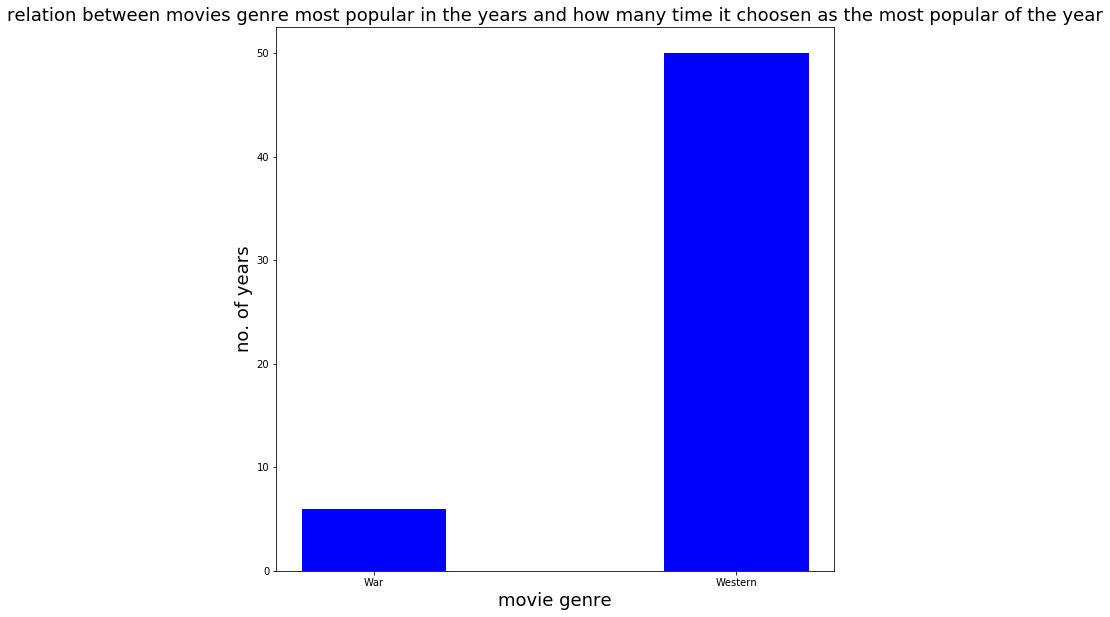

In [15]:
# plot relationship between release_year and vote_average

names=avg_vote_data['genres'].value_counts().index.tolist()
vals = avg_vote_data['genres'].value_counts().tolist()

plt.bar(names,vals, color ='blue', width = 0.4)
# x-axis name
plt.xlabel('movie genre', fontsize=18)
# y-axis name
plt.ylabel('no. of years', fontsize=18)

plt.title('relation between movies genre most popular in the years and how many time it choosen as the most popular of the year',fontsize=18)
# plt.b
plt.show()

### Research Question 2:  What kinds of properties are associated with movies that have high revenues?

### lets see the relation between the popularity and revenue

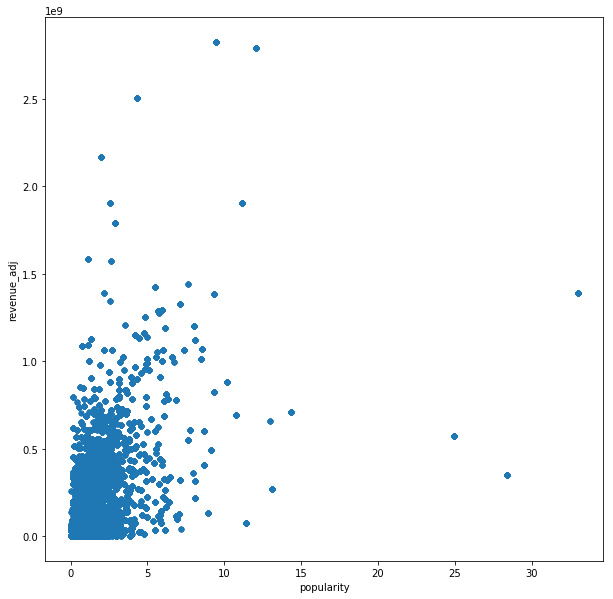

In [16]:
df.plot(x='popularity' ,y='revenue_adj',kind='scatter')

#### the relation between popularity of the movie and its revenue is  "POSITIVE CORRELATION" 

### relation between the budget and revenue

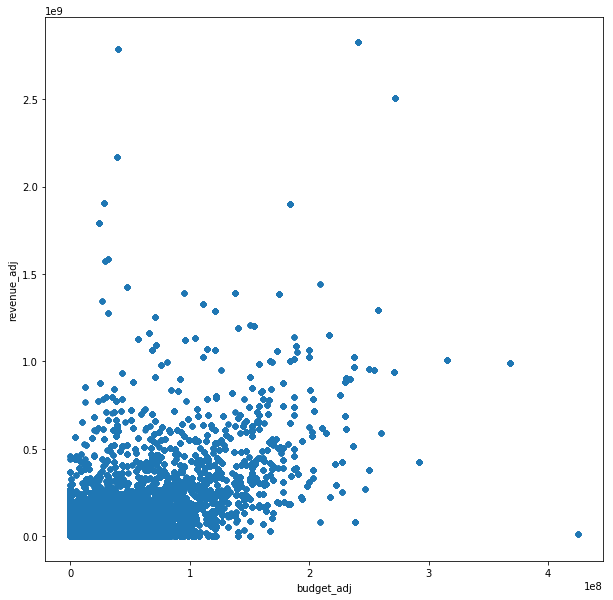

In [17]:
df.plot(x='budget_adj' ,y='revenue_adj',kind='scatter')


#### the relation between BUDJET of the movie and its revenue is  "POSITIVE CORRELATION" 

### relation between the runtime and revenue

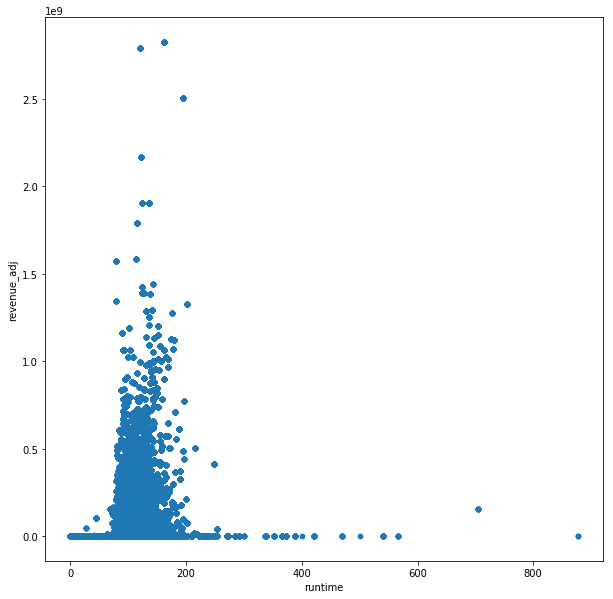

In [18]:
df.plot(x='runtime' ,y='revenue_adj',kind='scatter')


#### the relation between runtime of the movie and its revenue is  " NO CORRELATION"  no relation

###  relation between the vote_count and revenue

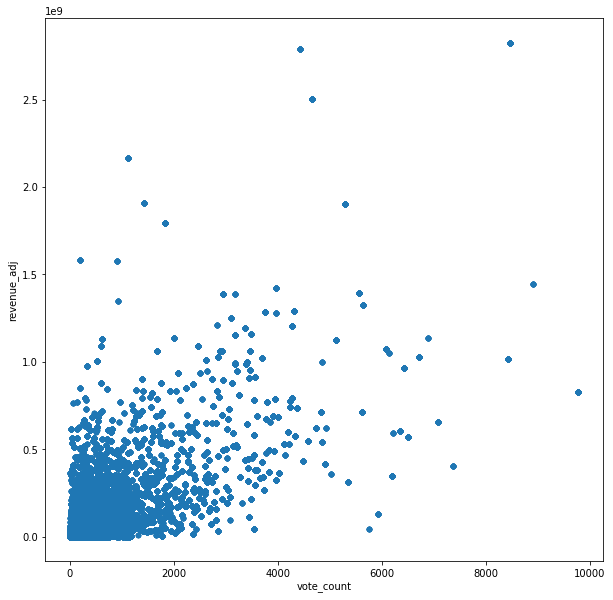

In [19]:
df.plot(x='vote_count' ,y='revenue_adj',kind='scatter')


#### the relation between vote_count of the movie and its revenue is  "POSITIVE CORRELATION" 

### relation between the vote_average and revenue


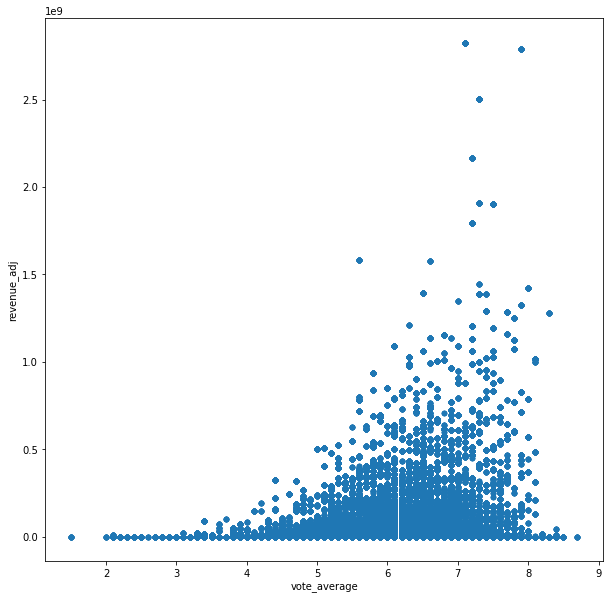

In [20]:
df.plot(x='vote_average' ,y='revenue_adj',kind='scatter')


#### the relation between vote aveage of the movie and its revenue is  "POSITIVE CORRELATION" 

### relation between the vote_average and revenue


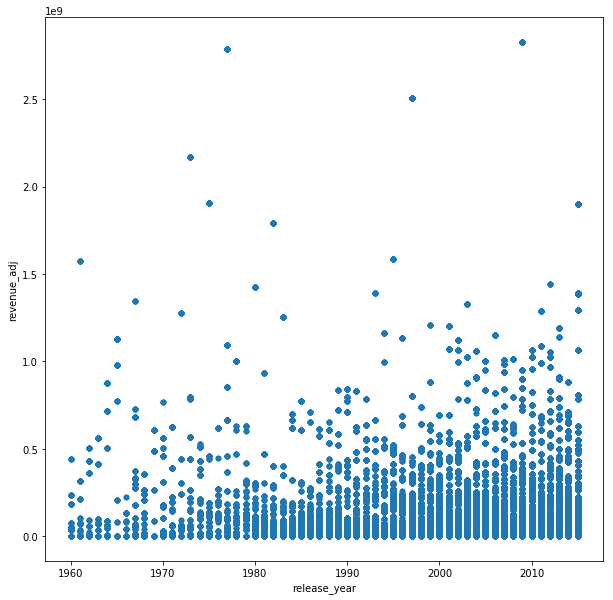

In [21]:
df.plot(x='release_year' ,y='revenue_adj',kind='scatter')


#### the relation between release year of the movie and its revenue is  "no CORRELATION"  no relation

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## question 1 conclution:
##### the movies with gerie "WESTER" are the most popular from year to year
##### the movies with gerie "WAR" are the 2ND most popular from year to year


## question 2 conclution:
##### as the popularity of the movie increase , the revenue increase
##### as the budget (budget_adj) of the movie increase , the revenue increase
##### no relation between runtime and the revenue
##### as the vote_count of the movie increase , the revenue increase
##### as the vote_average of the movie increase , the revenue increase
##### no relation between the release year and the movie revenue


### so the properties associated with movies that have high revenues  are
#### 1- high popularity , 2- high budget , 3- high vote count , 4- high vote average




## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [22]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0